In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

In [4]:
df_comb = pd.read_csv("mapper16/combined.csv")
#df_comb = df_comb[(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate']) > 0.95]
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)
df_comb["ratek"] = df_comb['SourcenumRecordsOutPerSecond_avg']/1000.0
df_comb["itrm"] = df_comb["itr"]/1000.0

In [7]:
def graph(rate, dfo, dfu, dfpo, dfpe, dfs, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent', customl=0):
    plt.rcParams['figure.figsize'] = 12, 6
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    print(len(dfu[metric].tolist()))
    fig, ax = plt.subplots()

    #scatter_c1 = ax.scatter(dfu[metric].tolist(),
    #                        dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.itrm, edgecolor="black", 
    #                        cmap='Blues', marker=MarkerStyle("o"), label=None, alpha=0.8)

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o"), alpha=0.8)
    
    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='lime',
                           marker=MarkerStyle("s"), label="ondemand", alpha=0.8)
    
    ax.scatter(dfpo[metric].tolist(),
                            dfpo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='cyan',
                           marker=MarkerStyle("p"), label="powersave", alpha=0.8)

    ax.scatter(dfpe[metric].tolist(),
                            dfpe['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='magenta',
                           marker=MarkerStyle("h"), label="performance", alpha=0.8)

    ax.scatter(dfs[metric].tolist(),
                            dfs['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='yellow',
                           marker=MarkerStyle("d"), label="schedutil", alpha=0.8)
    
    # Add colorbars
    #cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='vertical', label="ITR (ms)")
    cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='vertical', label="DVFS (Ghz)")

    ax.set_xlabel('RPS (K)')
    ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=40, top=70)

    ax.set_title(f"Query1 @ {int(rate)}K RPS", size=22)
    plt.legend(fontsize=22, loc='upper left', ncols=2, facecolor='white', framealpha=1.0)
    plt.grid()
    
    plt.tight_layout()

314


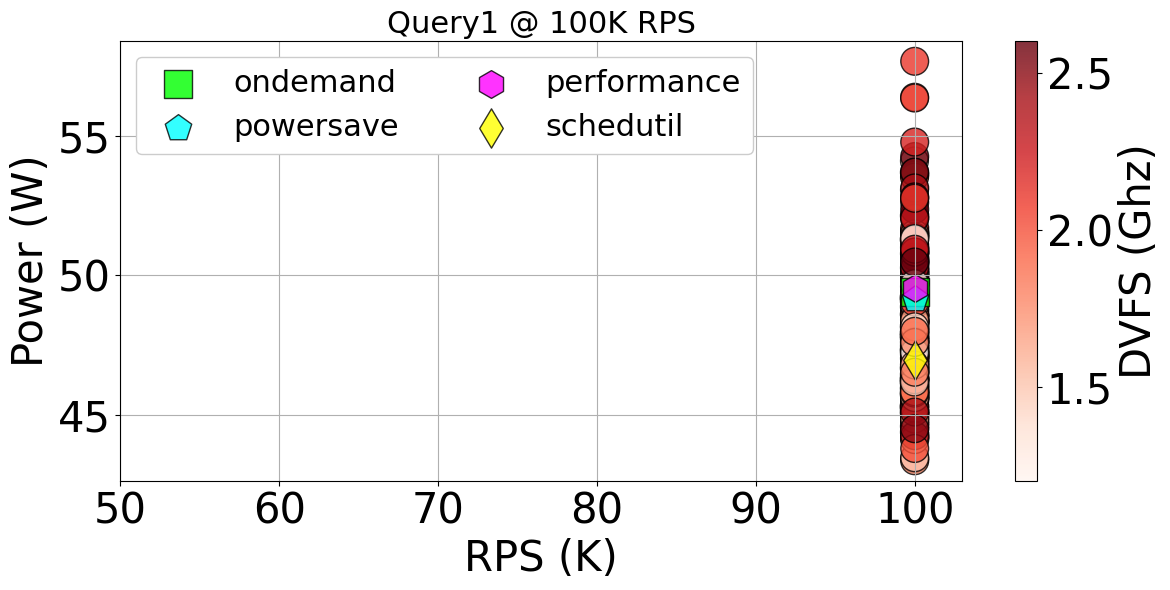

In [9]:
rate = 100000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 50, int(ratek+(ratek*0.03)), metric='ratek')
plt.savefig("query1dvfs100K.pdf", bbox_inches='tight')


314


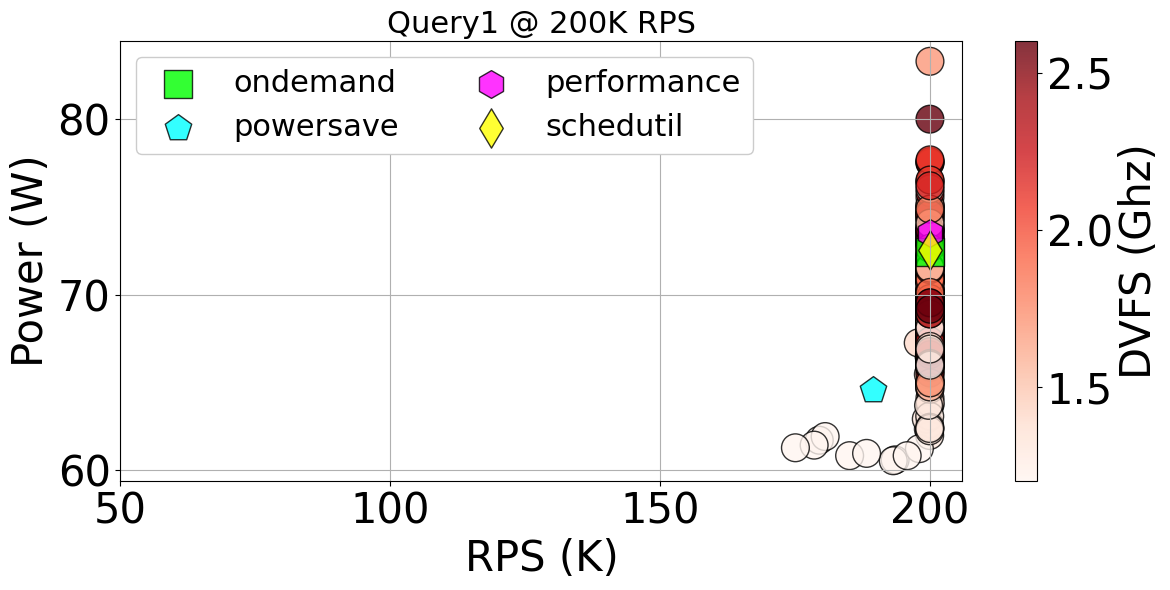

In [10]:
rate = 200000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 50, int(ratek+(ratek*0.03)), metric='ratek')
plt.savefig("query1dvfs200K.pdf", bbox_inches='tight')


315


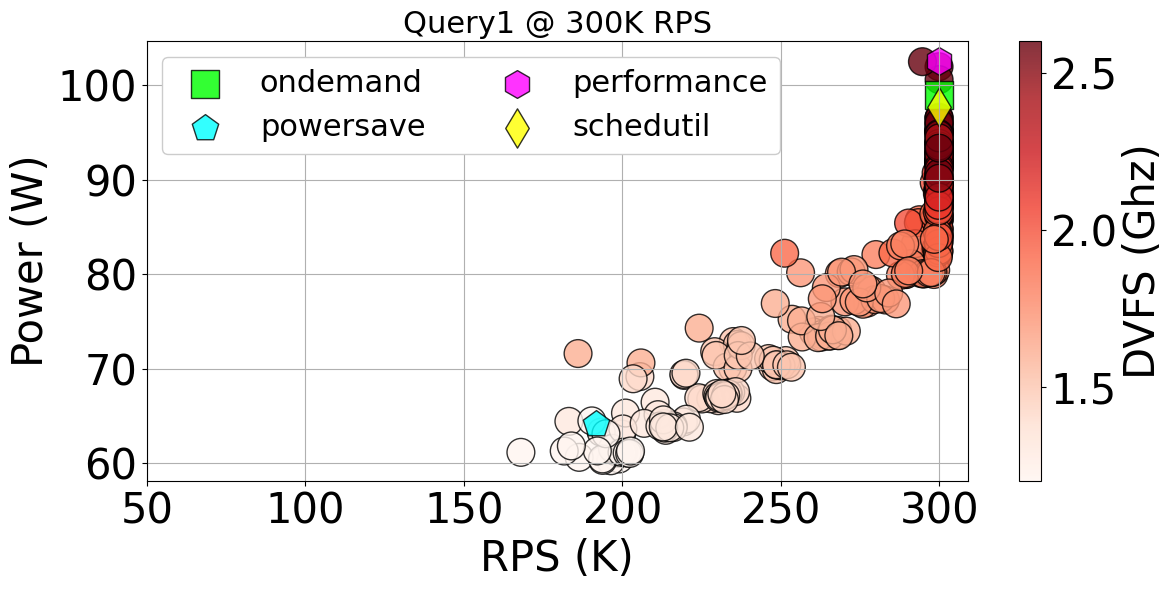

In [11]:
rate = 300000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 50, int(ratek+(ratek*0.03)), metric='ratek')
plt.savefig("query1dvfs300K.pdf", bbox_inches='tight')


315


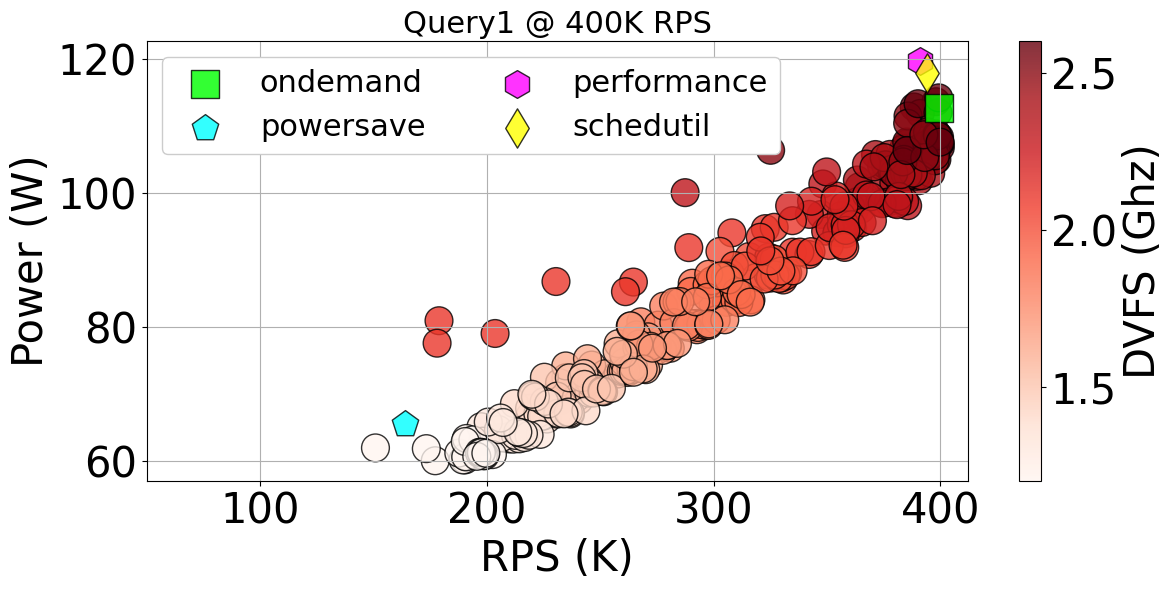

In [13]:
rate = 400000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 50, int(ratek+(ratek*0.03)), metric='ratek')
plt.savefig("query1dvfs400K.pdf", bbox_inches='tight')
